# Which National Park has the most observation of Rarest bat? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Species csv for our 1st DataSet


In [2]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Load the Observation csv for our 2nd DataSet

In [3]:
observation = pd.read_csv("observations.csv")
observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Inspect the rows and columns of our 2 data sets 

In [4]:
print(f"species : {species.shape}")
print(f"observation : {observation.shape}")

species : (5824, 4)
observation : (23296, 3)


## Determine how many unique value the species df has

In [5]:
print(f"number of species : {species.scientific_name.nunique()}")


number of species : 5541


## Determine how many unique category of animals our species df has


In [6]:
print(f"number of categories : {species.category.nunique()}")
species.category.unique()

number of categories : 7


array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

### Lets group the our data set by category to see the different distribution of the Species DF

In [7]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

### Next is exploring the other column of conservation status. We can see that there is NaN value(missing data in our DF) .

In [8]:
print(f"number of conservation statuses : {species.conservation_status.nunique()}")
species.conservation_status.unique()

number of conservation statuses : 4


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Now lets count the missing data in our data frame. In my observation this missing data for conservation status is for No Intervation for each species with NaN value

In [9]:
print(f"missing data for conservation status : {species.conservation_status.isna().sum()}")
species.groupby("conservation_status").size()

missing data for conservation status : 5633


conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

## Now next step will be exploring our 2nd DataFrame which is the observations in National Park


### Let's explore how many unique parks are there in our DataFrame

In [10]:
print(f"number of park names : {observation.park_name.nunique()}")
observation.park_name.unique()

number of park names : 4


array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

### Let's see how many observations that are collected in our data set

In [11]:
print(f"number of observations : {observation.observations.sum()}")

number of observations : 3314739


## Now let's fix our dataframe cause this NaN value will become a problem when we will do our Exploratory Data Analysis

### Let's replace the NaN value with No Intervention and then lets view the new category value to check if there's still missing value

In [12]:
species.fillna("No Intervention", inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

### Now lets explore the species df but lets not include the data with No Intervention needed. Let's group the data by conservation_status and category to have to have a better look in our data and the distribution of the conservation status of each species with their specific category

After grouping the data we can observe that the column Species of Concern has the most significant value

In [13]:
conservationCategory = species[species.conservation_status != "No Intervention"].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


To have a better look in our observation lets plot that data using bar plot. We can see in the plot a lot of species category has a significant increase than the rest of other conservation status

Text(0, 0.5, 'Number of Species')

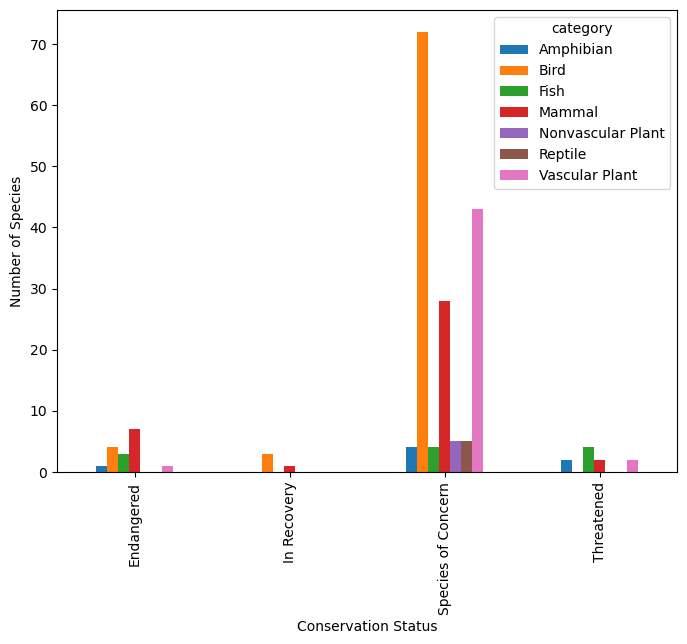

In [14]:
ax = conservationCategory.plot(kind='bar', figsize=(8,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called is_protected and include any species that had a value other than No Intervention. 

In [15]:
species['is_protected'] = species.conservation_status != 'No Intervention'

Now lets create a subset which will determine which species category is more likely to be endangered or not by grouping category column and is_protected column and giving two values to is_protected with protected or not_protected.

In [16]:
catergory_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
catergory_counts.columns =['category', 'not_protected', 'protected']
catergory_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


To have much better look it's really ideal to compute the percentage of protected species lets add another column percent_protected that will compute the percentage

In [17]:
catergory_counts['percent_protected'] = catergory_counts.protected / (catergory_counts.protected + catergory_counts.not_protected) * 100
catergory_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


To give us better visualization of the data lets plot it in to pie chart.

We can see that Mammals and Birds is much higher percentage than other species

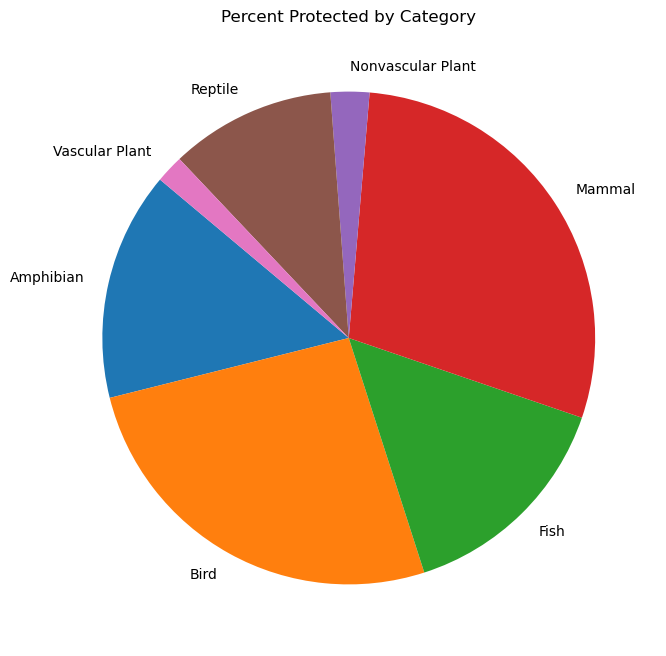

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(catergory_counts.percent_protected, labels=catergory_counts.category, startangle=140)
plt.title('Percent Protected by Category')
plt.show()

## After my observation I want to focus on Mammals

Now let's create a function that performs text processing on the common_names column of a DataFrame named species, specifically for entries where the category is 'Mammal'. The goal is to clean and tokenize the common names for further analysis.

In [19]:
from itertools import chain
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == 'Mammal'].common_names.apply(remove_punctuation).str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

After tokenizing and cleaning the common names in the common_Names list, let's remove duplicate words within each sublist. Let's store the result in a new list named cleanRows.

In [20]:
cleanRows =[]
for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

After cleaning the common names and removing duplicates, let's flattens the list of sublists (cleanRows) into a single list. We will achieved this using the chain.from_iterable method, resulting in a flattened list named res.

In [21]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

After flattening the list of cleaned and unique common names (res), let's counts the frequency of each word and presents the top 10 words in a DataFrame.

We can see that bat is the has the most frequency in our data set. We can focus on Species which are Bats

In [22]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values("Count", ascending =False).head(10)

,Word,Count
69,Bat,23
22,Shrew,18
128,Myotis,17
81,Mouse,16
50,Chipmunk,13
30,American,12
57,Squirrel,12
102,Eastern,11
150,Vole,11
100,Western,10


Now let's add another column is_bat in our species dataframe that will determine if the species is_bat cause we will be focusing on Bats. We will filter data DF by using method .contains and regex to match the pattern.

In [23]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Now let's filter and count how many species is a bat in our data frame lets also take a look in there conservation statuses

In [24]:
print(f"number of bat species : {species.is_bat.sum()} ")
species[species.is_bat]

number of bat species : 23 


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next is merging the two DataFrame in one DF called bat_observations so we can make an analysis on what are the species of bats that are observe in National Parks

In [25]:
bat_observations = observation.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's group our dataframe by park_name to see how many observations of bat seen in that specific park

In [26]:
bat_observations_grouped = bat_observations.groupby('park_name').observations.sum().reset_index()
bat_observations_grouped

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


To have a better look in what the data is saying we can create a another bar plot so we can see which park has the most observations of bats in our data. We can see in our plot that YellowStone Park has the most bats observation in data frame

Text(0.5, 1.0, 'Total Bat Observations by Park')

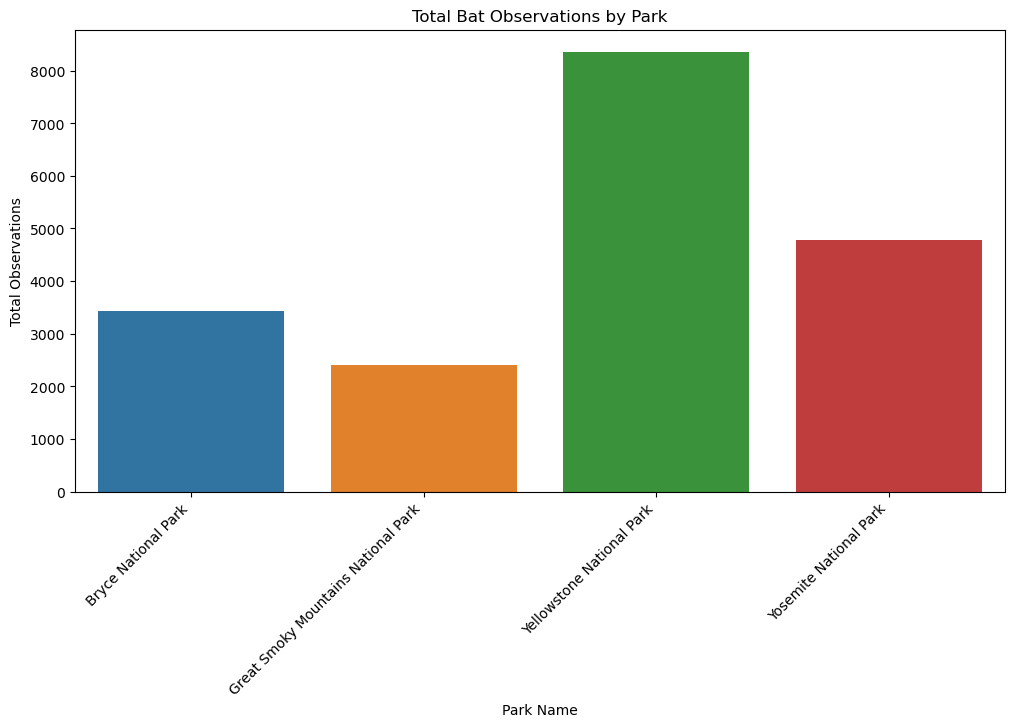

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='park_name', y='observations', data=bat_observations_grouped)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.title('Total Bat Observations by Park')

Now lets plot our final analysis. We can see in our plot that YellowStone Park has the most observation of bat in parks dataset. We can also see that there's a lot of observation of bats that Endangered, Threatened and Species of Concern that's a very good new for folk's bats. So if you are a bat enthusiast and want to see rare bats before they gone extinct(hopefully not cross fingers) you go to Yellow Stone Park and bring you binoculars and Camera!

Text(0.5, 1.0, 'Bat Observations by Park and Conservation Status')

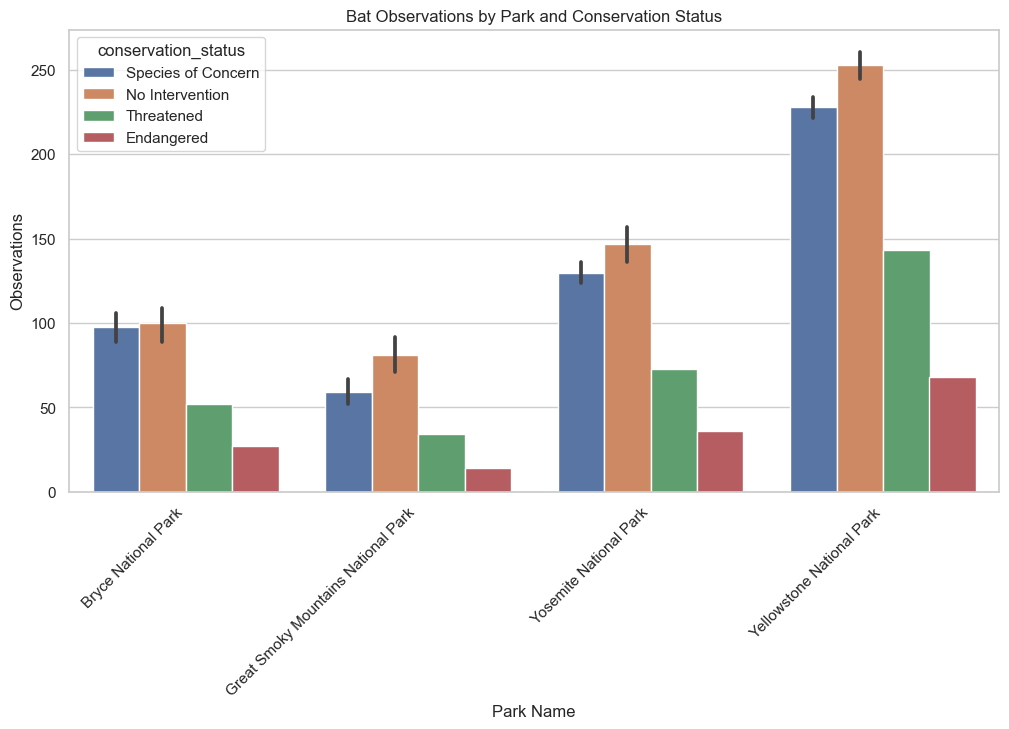

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='park_name', y='observations', hue='conservation_status', data=bat_observations)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Park Name')
plt.ylabel('Observations')
plt.title('Bat Observations by Park and Conservation Status')